<a href="https://colab.research.google.com/github/deepthikanna/The_Sparks_Foundation_Task01/blob/main/Task01__GRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NAME   : KRISHNA DEEPTHI K   







GRADUATE ROTATIONAL INTERNSHIP PROGRAM
# **THE SPARKS FOUNDATION**
                                                                                                                                                                                                                                                                               
DATA SCIENCE AND BUSINESS ANALYTICS TASKS

TASK 01 : PREDICTION USING SUPERVISED ML

      Predicting the percentage of student based on the number of study hours using PYTHON SCIKIT LEARN.


*IMPORT*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")


In [ ]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.sample(5)

,Hours,Scores
24,7.8,86
12,4.5,41
1,5.1,47
0,2.5,21
23,6.9,76


In [ ]:
data.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data['Scores'].max()

95

In [ ]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
print ("Dataset Lenght:: ", len(data))
print ("Dataset Shape:: ", data.shape)

Dataset Lenght::  25
Dataset Shape::  (25, 2)


In [ ]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


*VISUALIZE DATA*

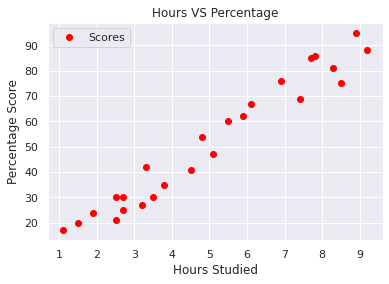

In [ ]:
data.plot(x="Hours",y="Scores",c="red",style='o')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.title("Hours VS Percentage")
plt.show()

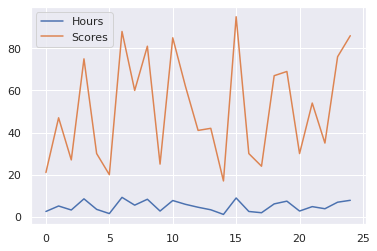

In [ ]:
data.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f152e8da278>,
      dtype=object)

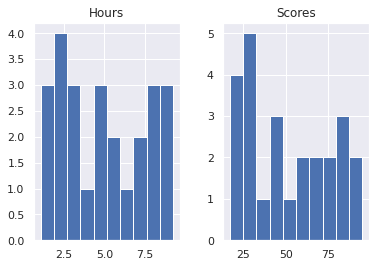

In [ ]:
data.hist()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


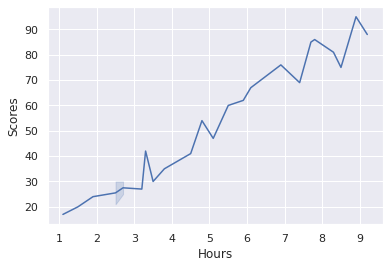

In [ ]:
sns.lineplot(data.Hours,data.Scores)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


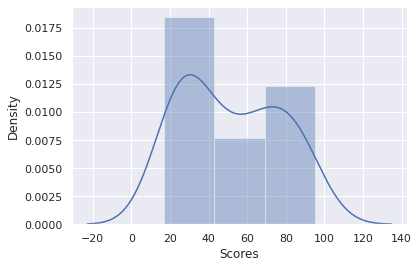

In [ ]:
sns.distplot(data.Scores)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


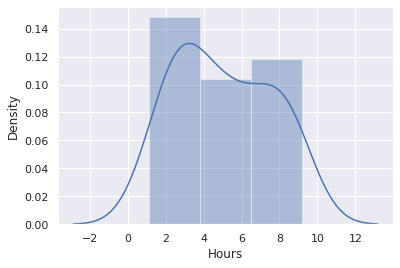

In [ ]:
sns.distplot(data.Hours)

*PREPARE DATA*

In [ ]:
from sklearn.model_selection import train_test_split
feature_col_names=['Hours']
predicted_class_names=['Scores']
x=data[feature_col_names].values
y=data[predicted_class_names].values
split_test_size=0.30
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=split_test_size,random_state=42)

In [ ]:
#To check the correctness of splitting
trainval=(1.0 * len(x_train)/(1.0 * len(data.index)))
testval=(len(x_test))/(len(data.index))
print(trainval)
print(testval)
print('{0:0.2f}% in training set '.format((trainval)*100))
print('{0:0.2f}% in testing set '.format((testval)*100))

0.68
0.32
68.00% in training set 
32.00% in testing set 


*TRAIN DATA*

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
m=model.coef_
print("Slope",m)

Slope [9.71054094]


In [ ]:
c=model.intercept_
print("Intercept",c)

Intercept 2.794196676599803


In [ ]:
print("Trained model y = " + str(np.round(model.intercept_,4)) + ' + ' +  str(np.round(model.coef_[0],4)) + 'x')

Trained model y = 2.7942 + 9.7105x


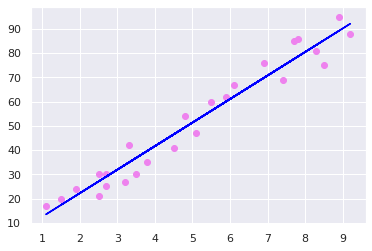

In [ ]:
plt.scatter(x, y,color="violet")
plt.plot(x, model.coef_ * x + model.intercept_, color = 'blue');
plt.show()

*PREDICTION*

In [ ]:
y_pred = model.predict(x_test)
df = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred.ravel()})  
df 

,Actual,Predicted
0,81,83.391686
1,30,27.070549
2,21,27.070549
3,76,69.796929
4,62,60.086388
5,25,29.012657
6,42,34.838982
7,47,52.317955


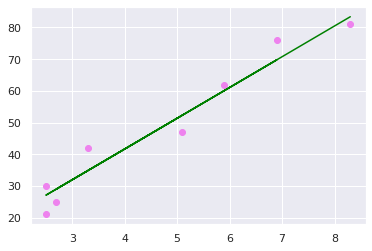

In [ ]:
plt.scatter(x_test,y_test,color = 'violet')
plt.plot(x_test,y_pred,color = 'green')

In [ ]:
Hours=np.array([[9.25]])
predict=model.predict(Hours)
print("No.of Hours",Hours)
print("Predicted Score",predict)

No.of Hours [[9.25]]
Predicted Score [92.61670034]


In [ ]:
Hours=float(input("Enter the number of hours : "))
predict=model.predict([[Hours]])
print("Predicted Score",predict)

Enter the number of hours : 4.2
Predicted Score [43.57846861]



*MODEL EVALUATION*

In [ ]:
from sklearn import metrics
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error, accuracy_score

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Root mean square error : " + str(rmse))
print("R-squared value : " + str(r2))
print("Mean Absolute Error : " + str(mae))

Root mean square error : 4.859985351228103
R-squared value : 0.9487647340257012
Mean Absolute Error : 4.499999999999998


*RESULT*

In [ ]:
hours = [[9.25]]
print("Predicted score if a student studies for " + str(hours[0][0]) + " hrs/day = " + str(round(model.predict(hours)[0],4)))

Predicted score if a student studies for 9.25 hrs/day = 92.6167
